In [1]:
import pandas as pd
from utils_data import GEFcomWindLoader, create_wind_dataset
import matplotlib.pyplot as plt

In [2]:
dataset = create_wind_dataset()

In [3]:
dataset = dataset.set_index('TIMESTAMP')
dataset.head()

TARGETVAR       U10       V10      U100      V100  \
TIMESTAMP                                                                
2012-01-01 01:00:00   0.000000 -0.307548  0.371263 -0.625438  0.298533   
2012-01-01 02:00:00   0.014954  0.140013  0.751585  0.024957  0.797498   
2012-01-01 03:00:00   0.071785  0.676113  1.472197  0.674786  1.626758   
2012-01-01 04:00:00   0.066796  0.907198  2.258822  0.936869  2.625774   
2012-01-01 05:00:00   0.034797  0.739418  2.907883  0.720637  3.501676   

                     ZONE_1  ZONE_2  ZONE_3  ZONE_4  ZONE_5  ZONE_6  ZONE_7  \
TIMESTAMP                                                                     
2012-01-01 01:00:00       0       0       0       0       0       0       0   
2012-01-01 02:00:00       0       0       0       0       0       0       0   
2012-01-01 03:00:00       0       0       0       0       0       0       0   
2012-01-01 04:00:00       0       0       0       0       0       0       0   
2012-01-01 05:00:00       0       0       0       0       0       0       0   

                     ZONE_8  ZONE_9  ZONE_10  
TIMESTAMP                                     
2012-01-01 01:00:00       1       0        0  
2012-01-01 02:00:00       1       0        0  
2012-01-01 03:00:00       1       0        0  
2012-01-01 04:00:00       1       0        0  
2012-01-01 05:00:00       1       0        0

In [4]:
dataset[dataset["TIMESTAMP"] <= "2013-11-01"]

KeyError: 'TIMESTAMP'

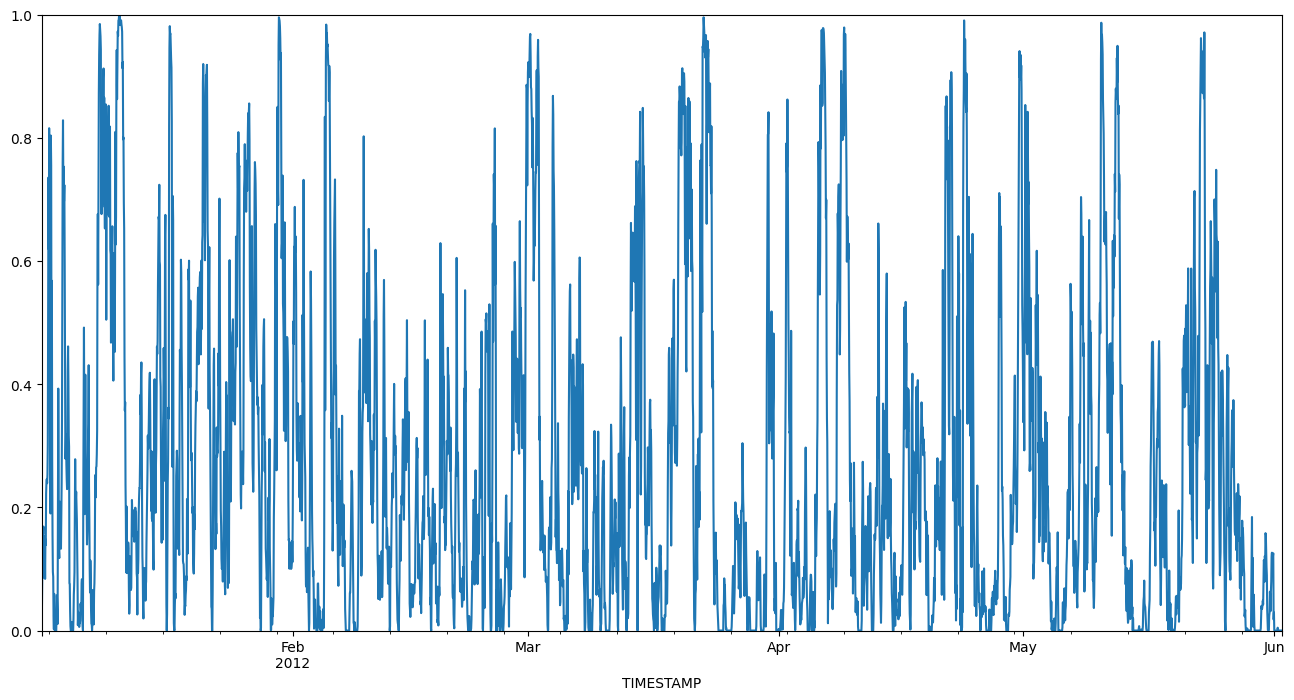

In [5]:
plt.figure(figsize=(16, 8))
dataset[dataset['ZONE_1'] == 1]['TARGETVAR']['2012-01-01':'2012-06-01'].plot()
# dataset[dataset['ZONE_3'] == 1]['TARGETVAR'].plot()

plt.ylim(0, 1)
plt.show()

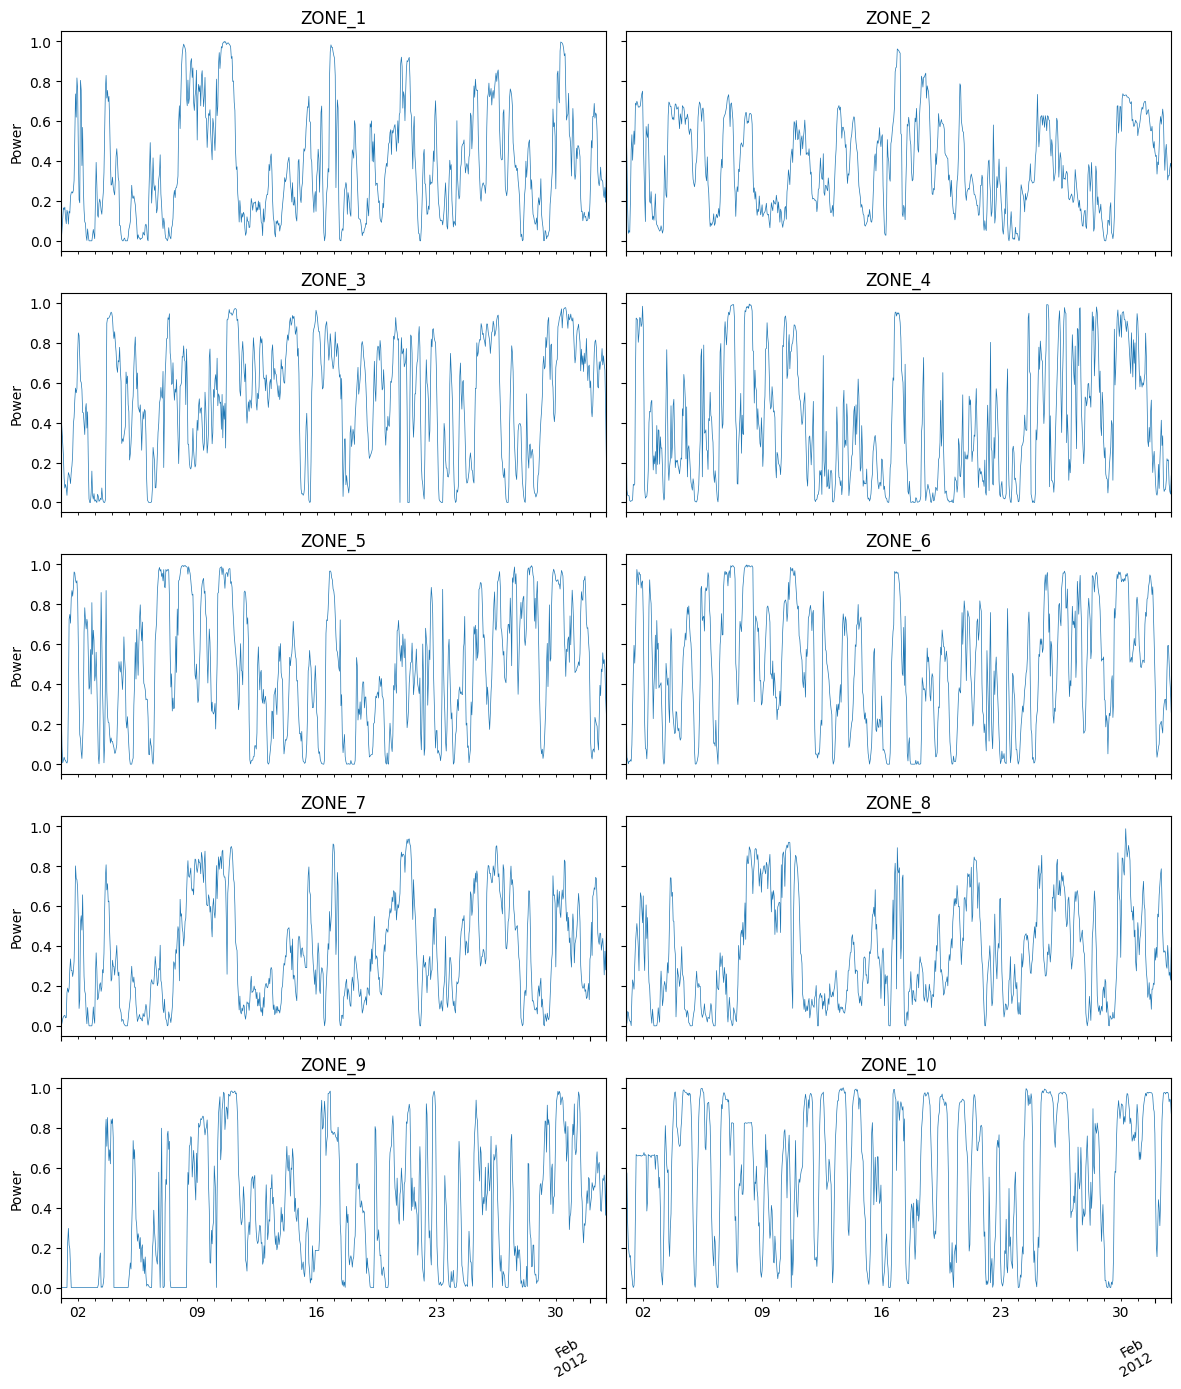

In [6]:
zones = ['ZONE_' + str(i) for i in range(1, 10 + 1)]

fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(12,14), sharex=True, sharey=True)

axes = axes.flatten()

for ax, zone in zip(axes, zones):
    zone_df = dataset[dataset[zone] == 1]
    zone_df['TARGETVAR']['2012-01-01':'2012-02-01'].plot(ax=ax, linewidth=0.5)
    # zone_df['TARGETVAR'].plot(ax=ax, linewidth=0.5)
    ax.set_title(zone)
    ax.set_ylabel('Power')
    ax.set_xlabel("")

fig.autofmt_xdate()
plt.tight_layout()
plt.show()

In [ ]:
print('Wind data %s days' %(len(dataset)/10/24))

Wind data 700.0 days


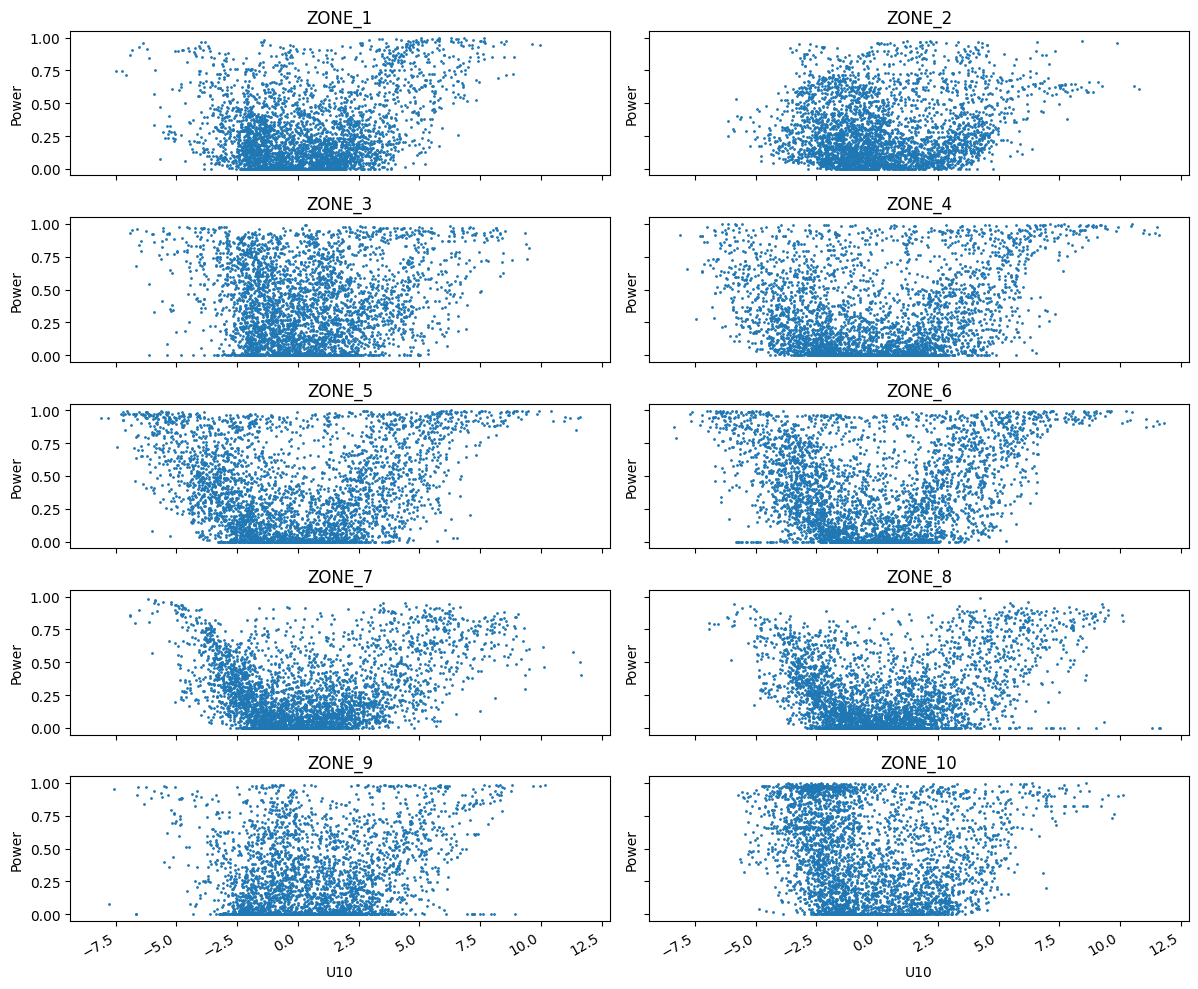

In [12]:
zones = ['ZONE_' + str(i) for i in range(1, 10 + 1)]

fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(12,10), sharex=True, sharey=True)

axes = axes.flatten()

for ax, zone in zip(axes, zones):
    zone_df = dataset[dataset[zone] == 1]['2012-01-01':'2012-06-01']
    # zone_df = dataset[dataset[zone] == 1]
    zone_power = zone_df['TARGETVAR']
    zone_wind_speed = zone_df['U10']
    ax.scatter(zone_wind_speed, zone_power, s=[1])
    ax.set_title(zone)
    ax.set_ylabel('Power')
    ax.set_xlabel("U10")

fig.autofmt_xdate()
plt.tight_layout()
plt.show()

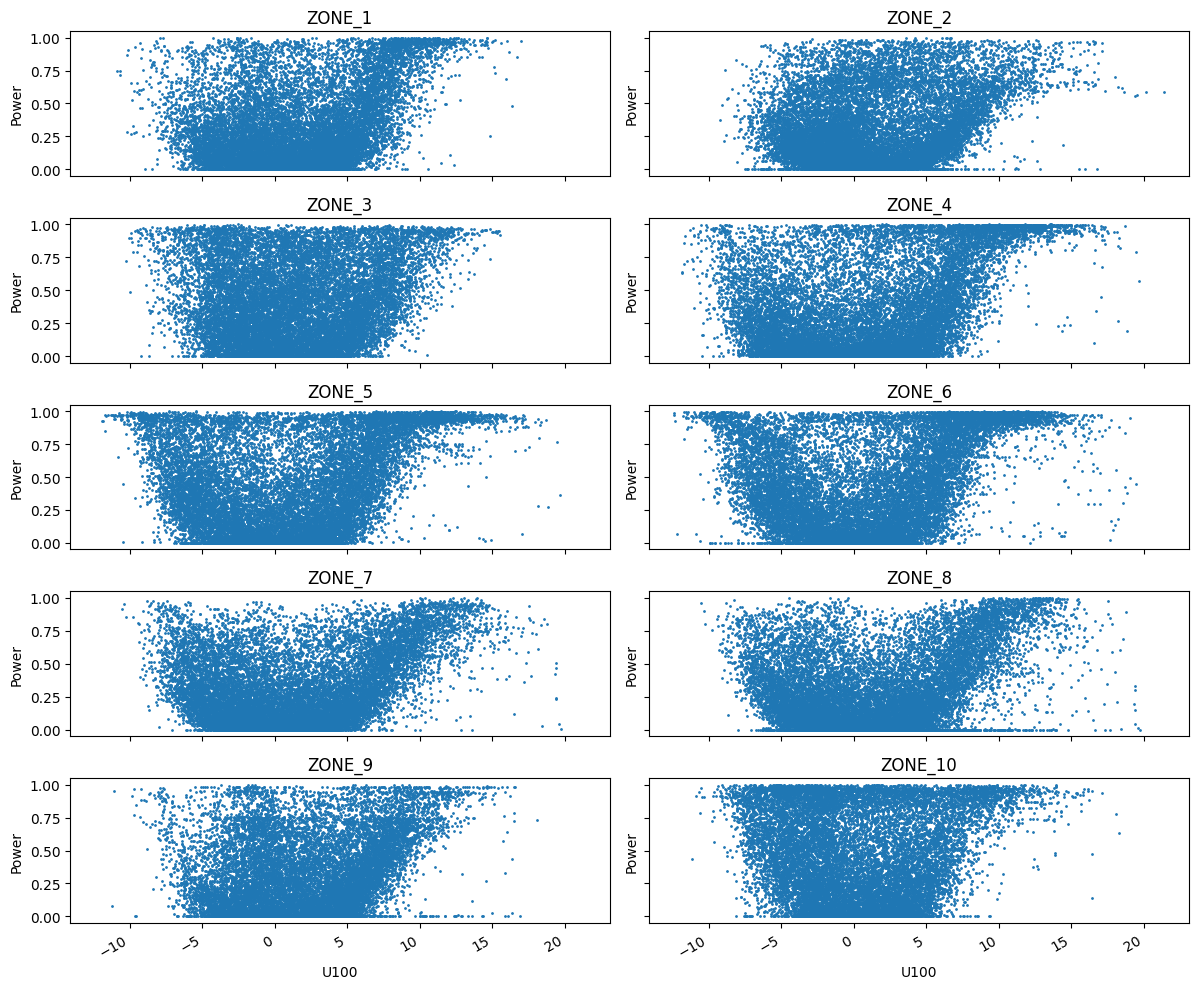

In [ ]:
zones = ['ZONE_' + str(i) for i in range(1, 10 + 1)]

fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(12,10), sharex=True, sharey=True)

axes = axes.flatten()

for ax, zone in zip(axes, zones):
    # zone_df = dataset[dataset[zone] == 1]['2012-01-01':'2012-06-01']
    zone_df = dataset[dataset[zone] == 1]
    zone_power = zone_df['TARGETVAR']
    zone_wind_speed = zone_df['U100']
    ax.scatter(zone_wind_speed, zone_power, s=[1])
    ax.set_title(zone)
    ax.set_ylabel('Power')
    ax.set_xlabel("U100")

fig.autofmt_xdate()
plt.tight_layout()
plt.show()

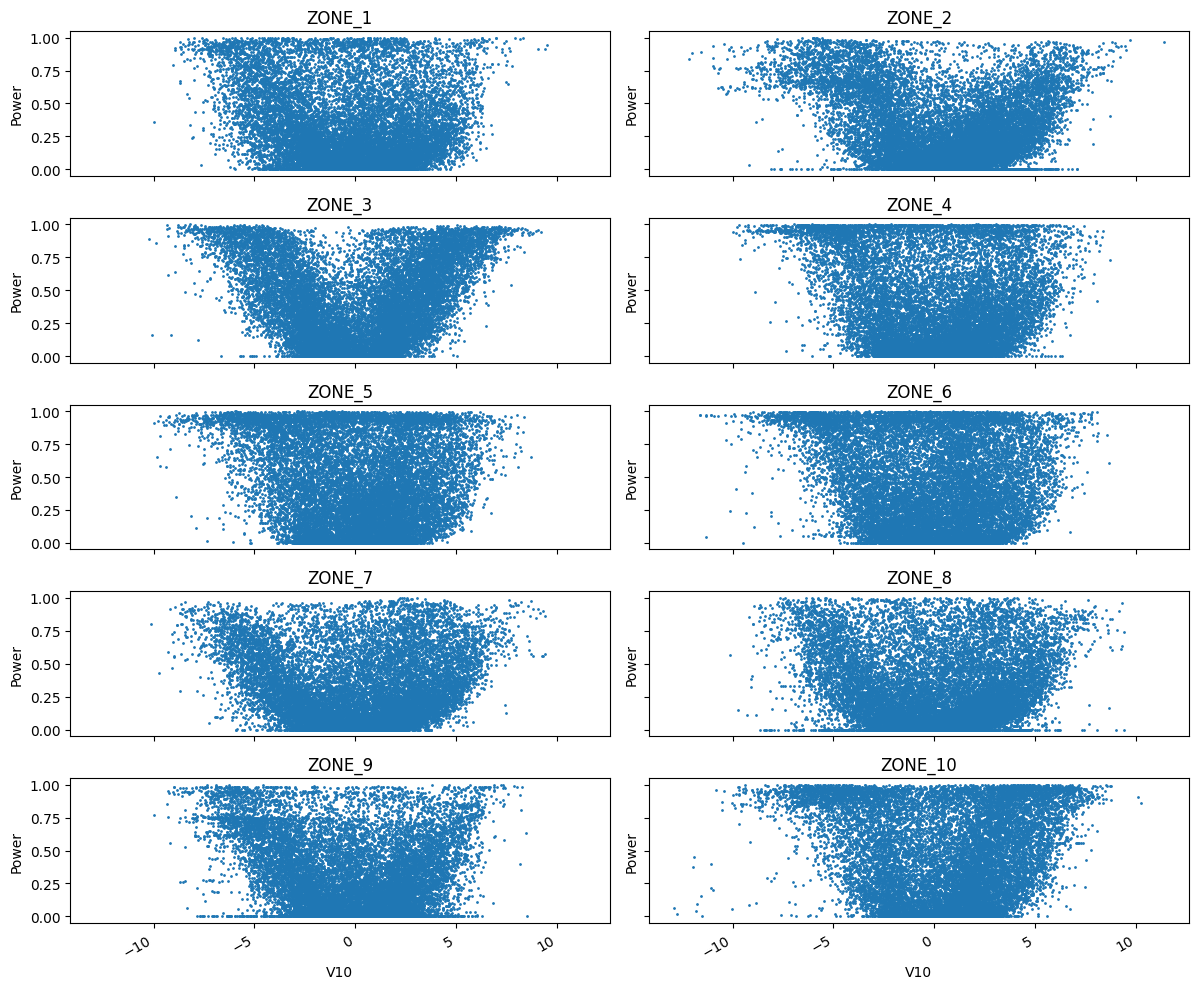

In [ ]:
zones = ['ZONE_' + str(i) for i in range(1, 10 + 1)]

fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(12,10), sharex=True, sharey=True)

axes = axes.flatten()

for ax, zone in zip(axes, zones):
    # zone_df = dataset[dataset[zone] == 1]['2012-01-01':'2012-06-01']
    zone_df = dataset[dataset[zone] == 1]
    zone_power = zone_df['TARGETVAR']
    zone_wind_speed = zone_df['V10']
    ax.scatter(zone_wind_speed, zone_power, s=[1])
    ax.set_title(zone)
    ax.set_ylabel('Power')
    ax.set_xlabel("V10")

fig.autofmt_xdate()
plt.tight_layout()
plt.show()

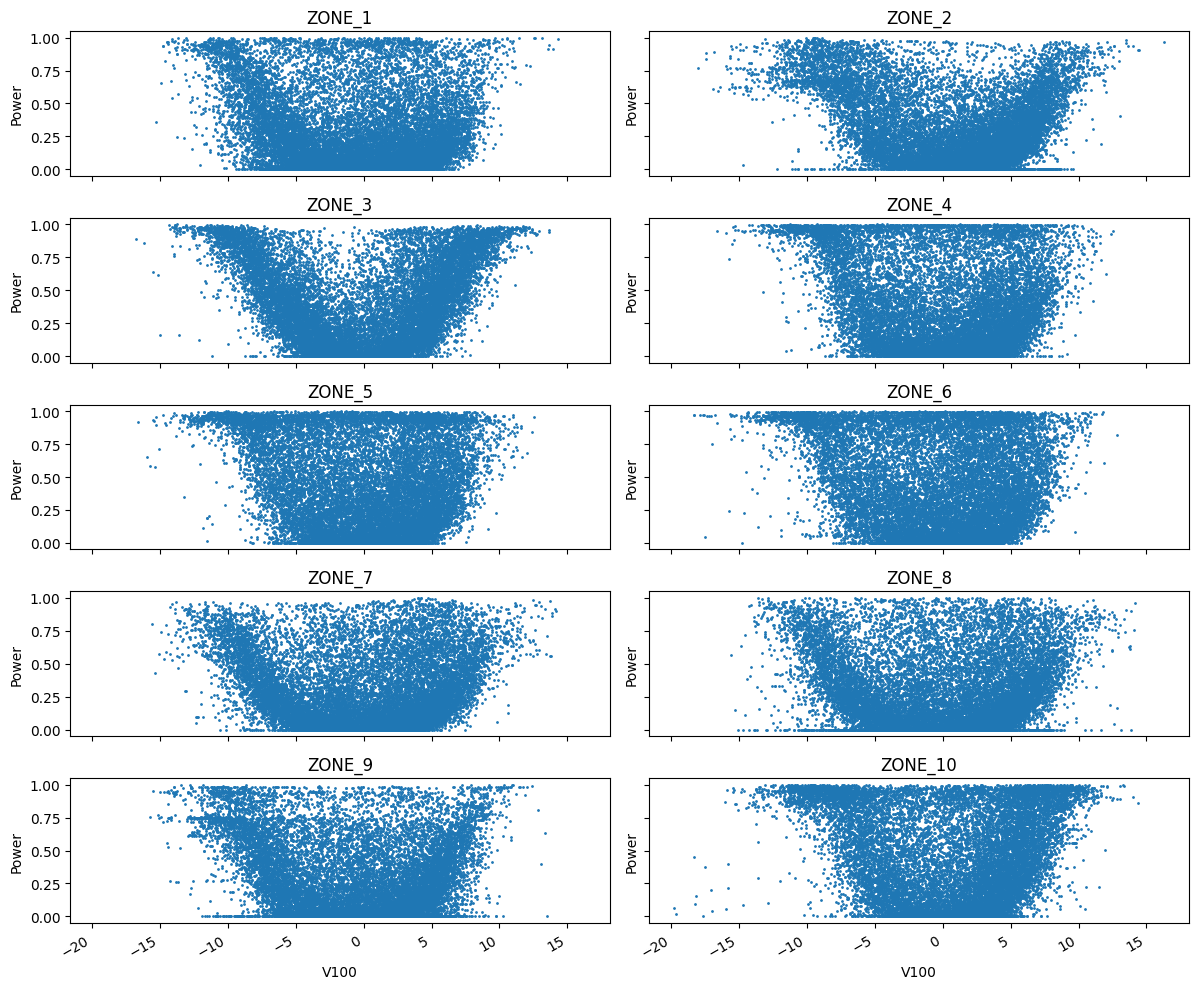

In [ ]:
zones = ['ZONE_' + str(i) for i in range(1, 10 + 1)]

fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(12,10), sharex=True, sharey=True)

axes = axes.flatten()

for ax, zone in zip(axes, zones):
    # zone_df = dataset[dataset[zone] == 1]['2012-01-01':'2012-06-01']
    zone_df = dataset[dataset[zone] == 1]
    zone_power = zone_df['TARGETVAR']
    zone_wind_speed = zone_df['V100']
    ax.scatter(zone_wind_speed, zone_power, s=[1])
    ax.set_title(zone)
    ax.set_ylabel('Power')
    ax.set_xlabel("V100")

fig.autofmt_xdate()
plt.tight_layout()
plt.show()

In [18]:
import numpy as np

density = 1

u10 = dataset['U10']
u100 = dataset['U100']
v10 = dataset['V10']
v100 = dataset['V100']

dataset['ws10'] = np.sqrt(u10**2 + v10**2)
dataset['ws100'] = np.sqrt(u100**2 + v100**2)
dataset['we10'] = 0.5 * density * dataset['ws10']**3
dataset['we100'] = 0.5 * density * dataset['ws100']**3
dataset['wd10'] = np.arctan2(v10, u10) * 180 / np.pi
dataset['wd100'] = np.arctan2(v100, u100) * 180 / np.pi

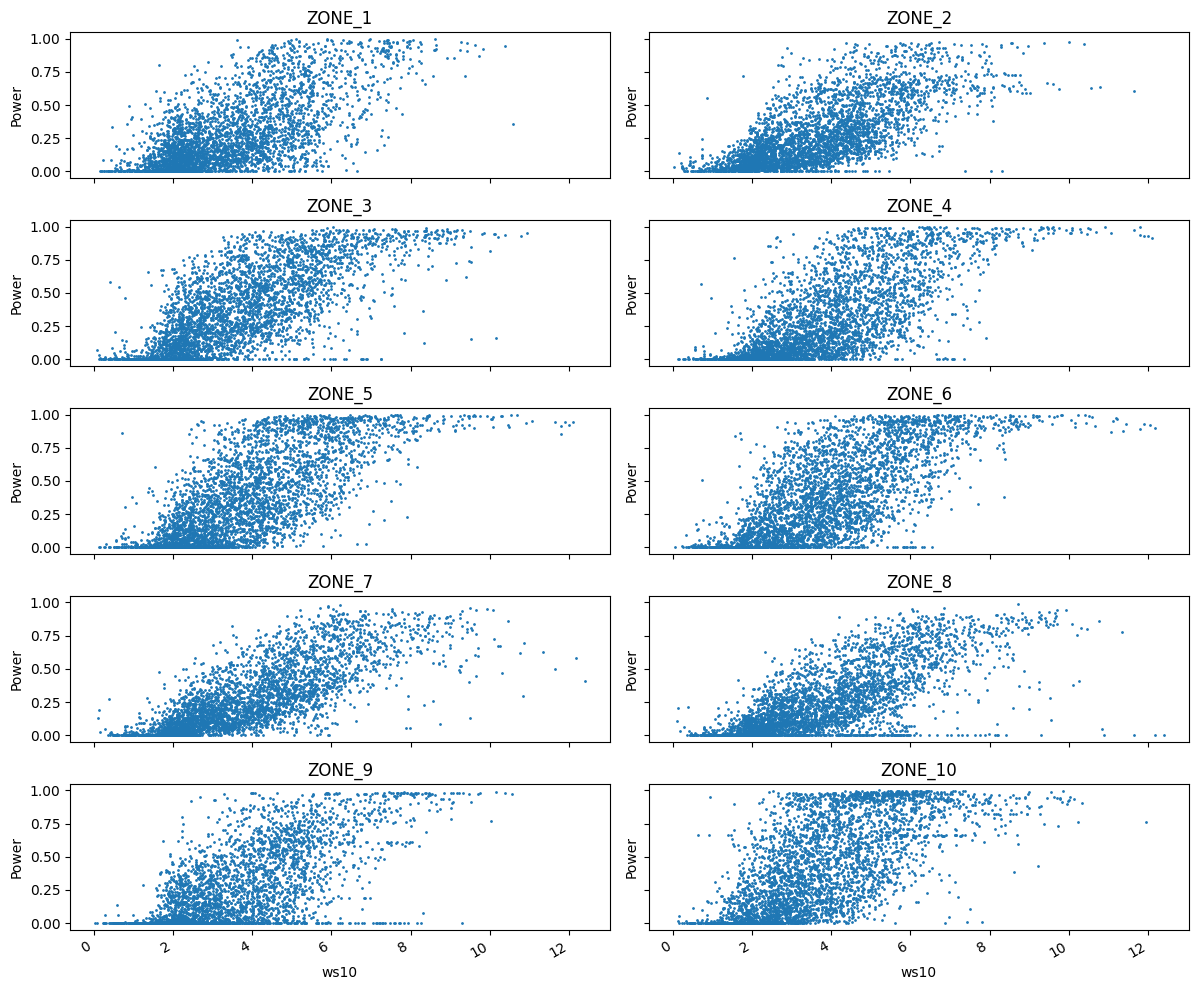

In [20]:
zones = ['ZONE_' + str(i) for i in range(1, 10 + 1)]

fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(12,10), sharex=True, sharey=True)

axes = axes.flatten()

for ax, zone in zip(axes, zones):
    zone_df = dataset[dataset[zone] == 1]['2012-01-01':'2012-06-01']
    # zone_df = dataset[dataset[zone] == 1]
    zone_power = zone_df['TARGETVAR']
    zone_wind_speed = zone_df['ws10']
    ax.scatter(zone_wind_speed, zone_power, s=[1])
    ax.set_title(zone)
    ax.set_ylabel('Power')
    ax.set_xlabel("ws10")

fig.autofmt_xdate()
plt.tight_layout()
plt.show()

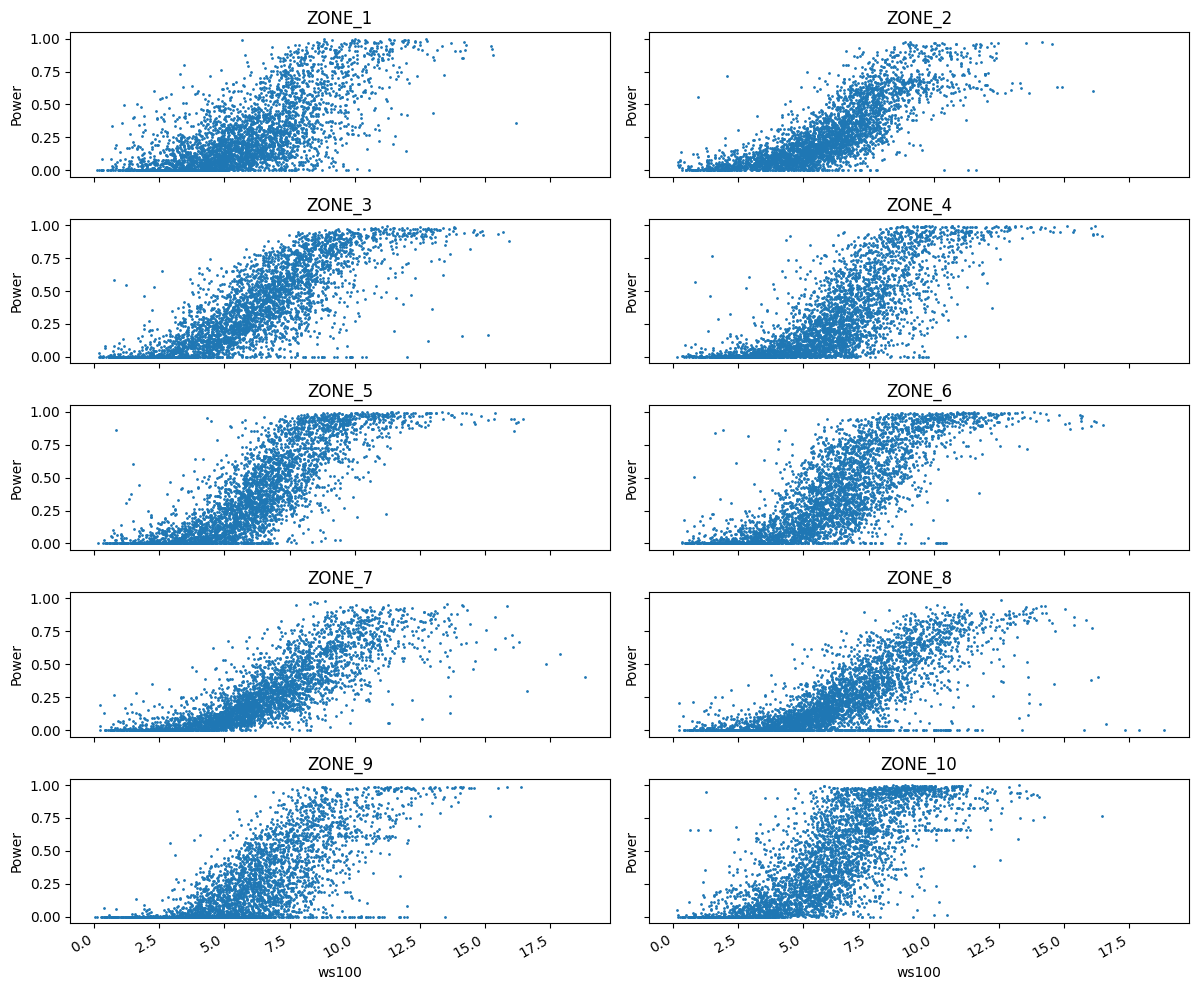

In [21]:
zones = ['ZONE_' + str(i) for i in range(1, 10 + 1)]

fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(12,10), sharex=True, sharey=True)

axes = axes.flatten()

for ax, zone in zip(axes, zones):
    zone_df = dataset[dataset[zone] == 1]['2012-01-01':'2012-06-01']
    # zone_df = dataset[dataset[zone] == 1]
    zone_power = zone_df['TARGETVAR']
    zone_wind_speed = zone_df['ws100']
    ax.scatter(zone_wind_speed, zone_power, s=[1])
    ax.set_title(zone)
    ax.set_ylabel('Power')
    ax.set_xlabel("ws100")

fig.autofmt_xdate()
plt.tight_layout()
plt.show()

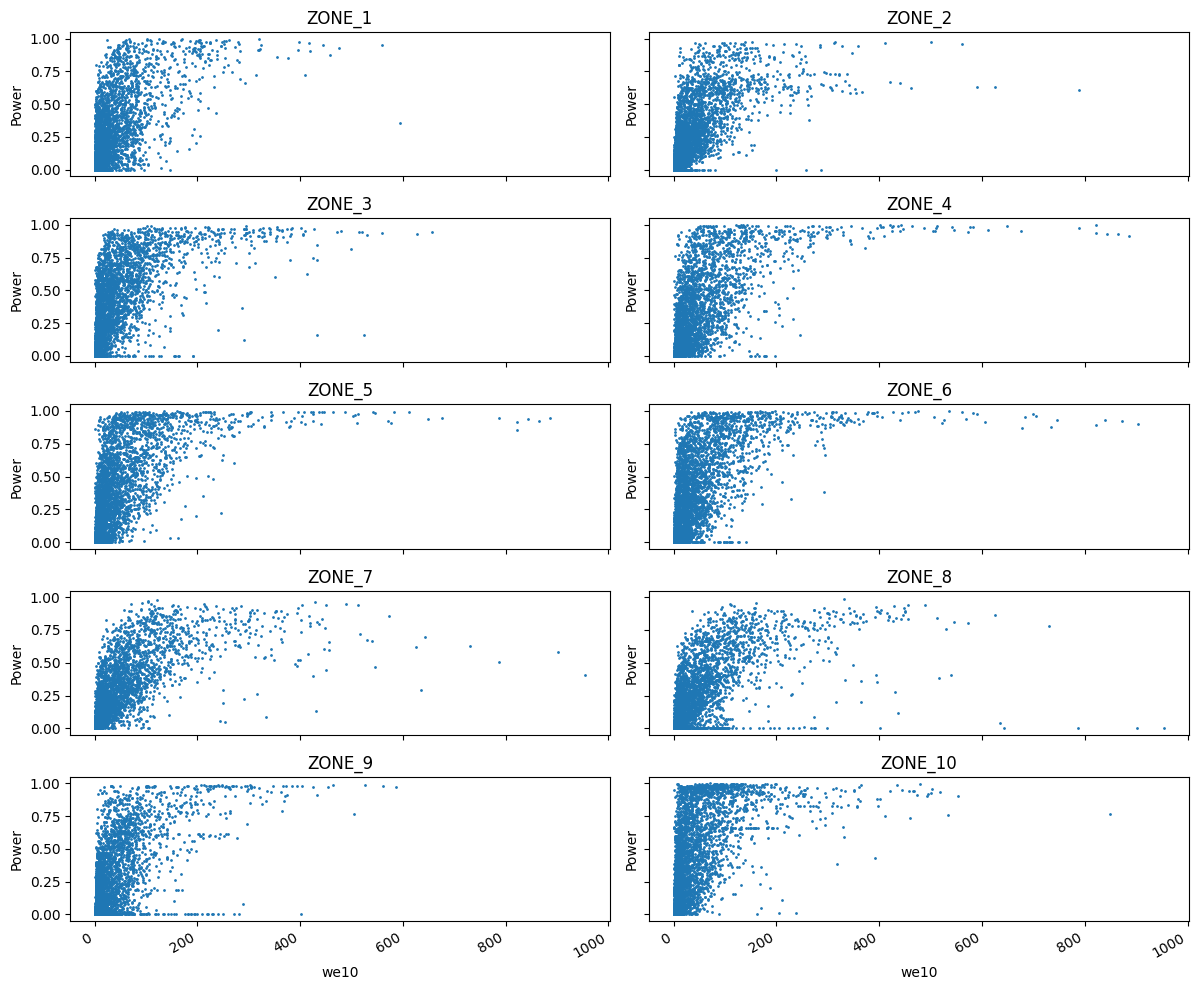

In [22]:
zones = ['ZONE_' + str(i) for i in range(1, 10 + 1)]

fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(12,10), sharex=True, sharey=True)

axes = axes.flatten()

for ax, zone in zip(axes, zones):
    zone_df = dataset[dataset[zone] == 1]['2012-01-01':'2012-06-01']
    # zone_df = dataset[dataset[zone] == 1]
    zone_power = zone_df['TARGETVAR']
    zone_wind_speed = zone_df['we10']
    ax.scatter(zone_wind_speed, zone_power, s=[1])
    ax.set_title(zone)
    ax.set_ylabel('Power')
    ax.set_xlabel("we10")

fig.autofmt_xdate()
plt.tight_layout()
plt.show()

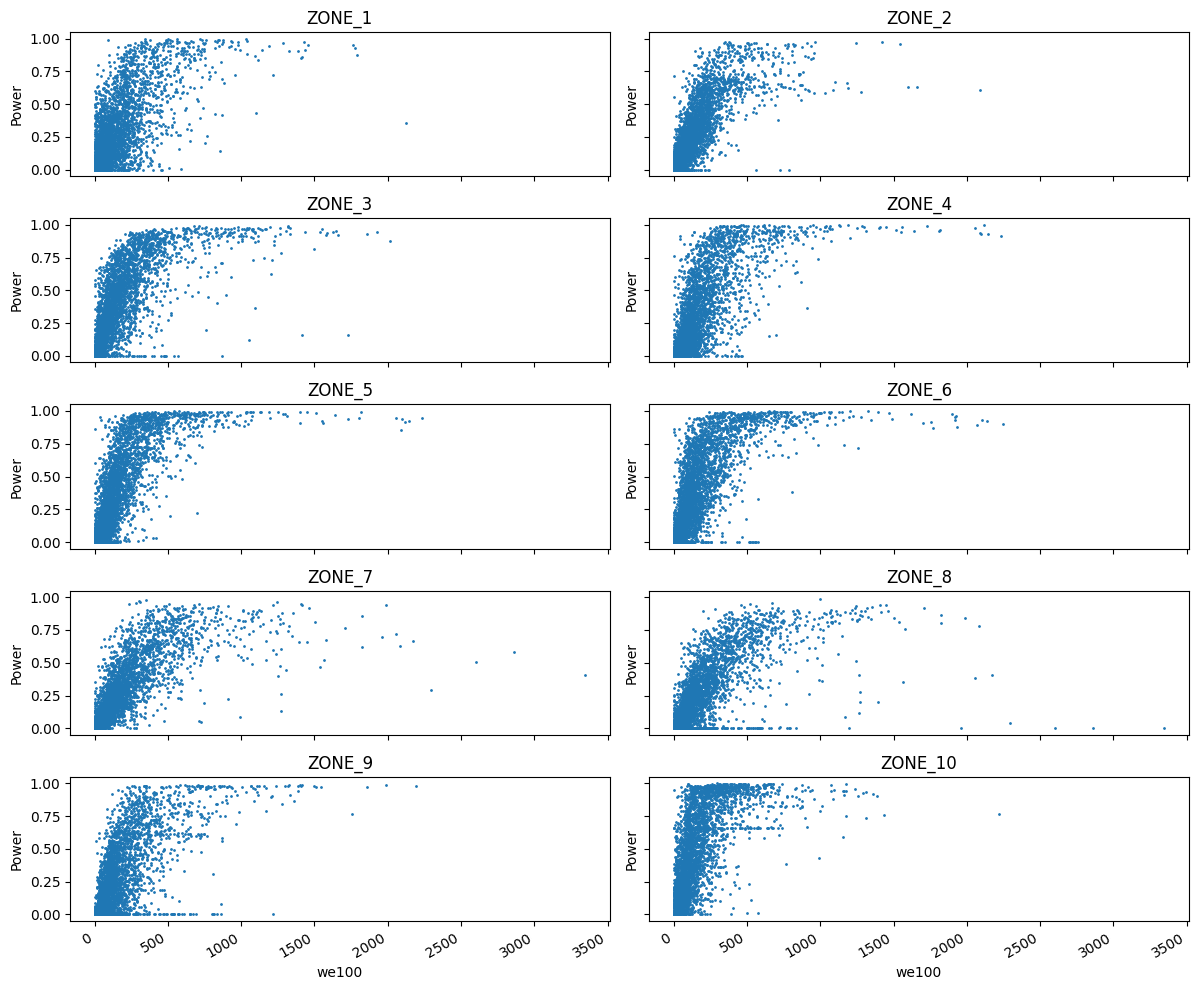

In [23]:
zones = ['ZONE_' + str(i) for i in range(1, 10 + 1)]

fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(12,10), sharex=True, sharey=True)

axes = axes.flatten()

for ax, zone in zip(axes, zones):
    zone_df = dataset[dataset[zone] == 1]['2012-01-01':'2012-06-01']
    # zone_df = dataset[dataset[zone] == 1]
    zone_power = zone_df['TARGETVAR']
    zone_wind_speed = zone_df['we100']
    ax.scatter(zone_wind_speed, zone_power, s=[1])
    ax.set_title(zone)
    ax.set_ylabel('Power')
    ax.set_xlabel("we100")

fig.autofmt_xdate()
plt.tight_layout()
plt.show()

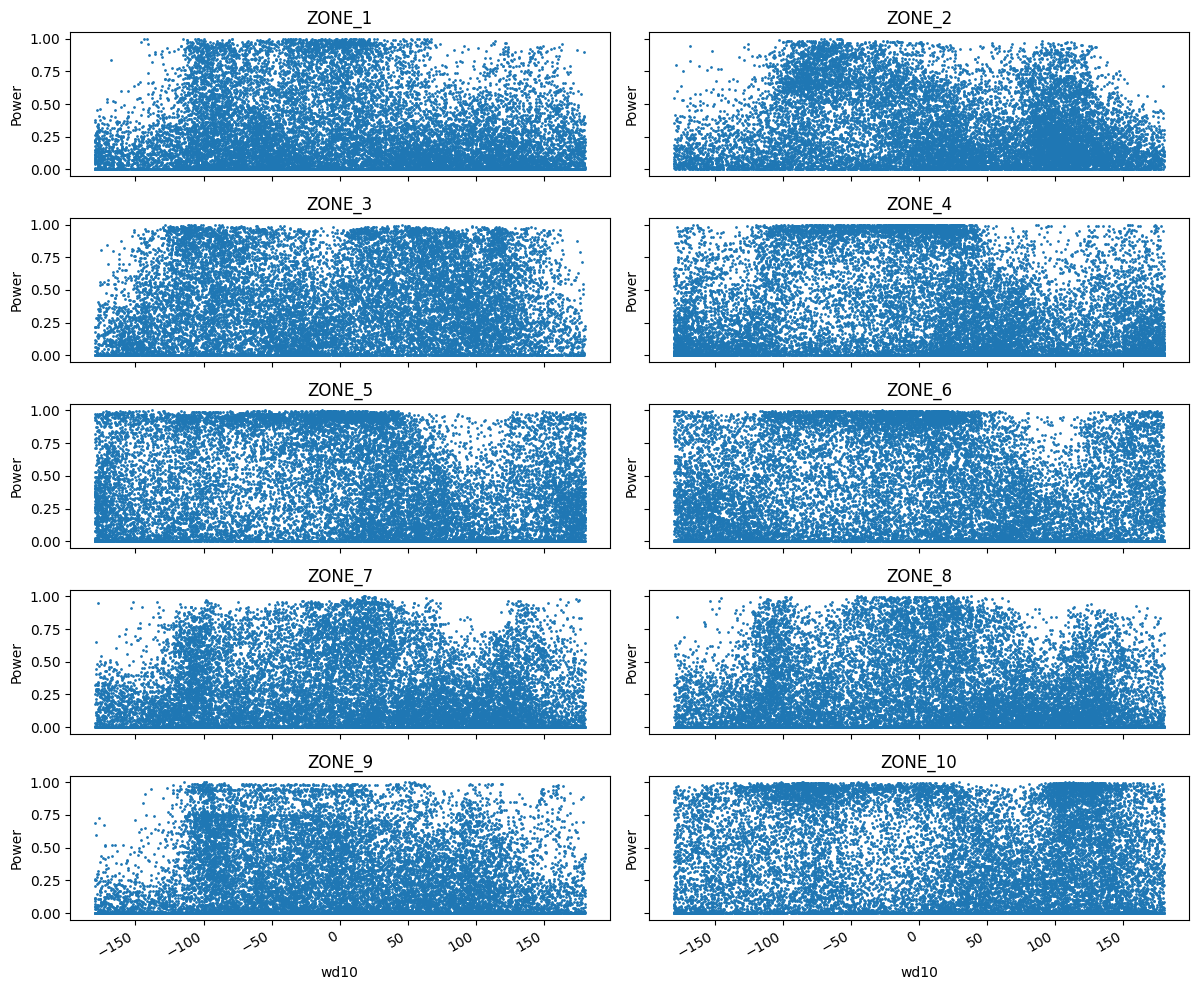

In [ ]:
zones = ['ZONE_' + str(i) for i in range(1, 10 + 1)]

fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(12,10), sharex=True, sharey=True)

axes = axes.flatten()

for ax, zone in zip(axes, zones):
    # zone_df = dataset[dataset[zone] == 1]['2012-01-01':'2012-06-01']
    zone_df = dataset[dataset[zone] == 1]
    zone_power = zone_df['TARGETVAR']
    zone_wind_speed = zone_df['wd10']
    ax.scatter(zone_wind_speed, zone_power, s=[1])
    ax.set_title(zone)
    ax.set_ylabel('Power')
    ax.set_xlabel("wd10")

fig.autofmt_xdate()
plt.tight_layout()
plt.show()

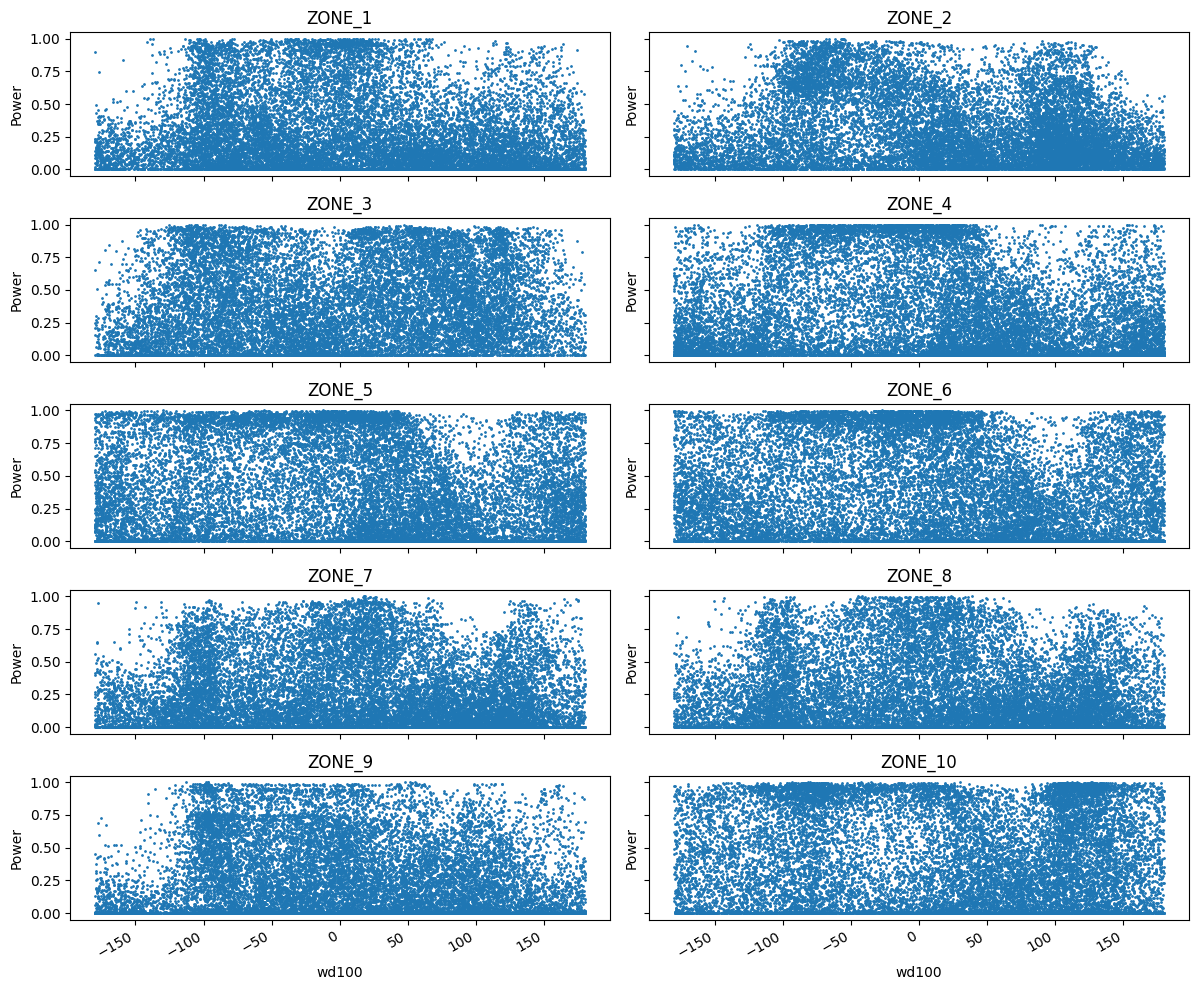

In [ ]:
zones = ['ZONE_' + str(i) for i in range(1, 10 + 1)]

fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(12,10), sharex=True, sharey=True)

axes = axes.flatten()

for ax, zone in zip(axes, zones):
    # zone_df = dataset[dataset[zone] == 1]['2012-01-01':'2012-06-01']
    zone_df = dataset[dataset[zone] == 1]
    zone_power = zone_df['TARGETVAR']
    zone_wind_speed = zone_df['wd100']
    ax.scatter(zone_wind_speed, zone_power, s=[1])
    ax.set_title(zone)
    ax.set_ylabel('Power')
    ax.set_xlabel("wd100")

fig.autofmt_xdate()
plt.tight_layout()
plt.show()

<Axes: title={'center': 'Monthly Average TARGETVAR'}, xlabel='TIMESTAMP'>

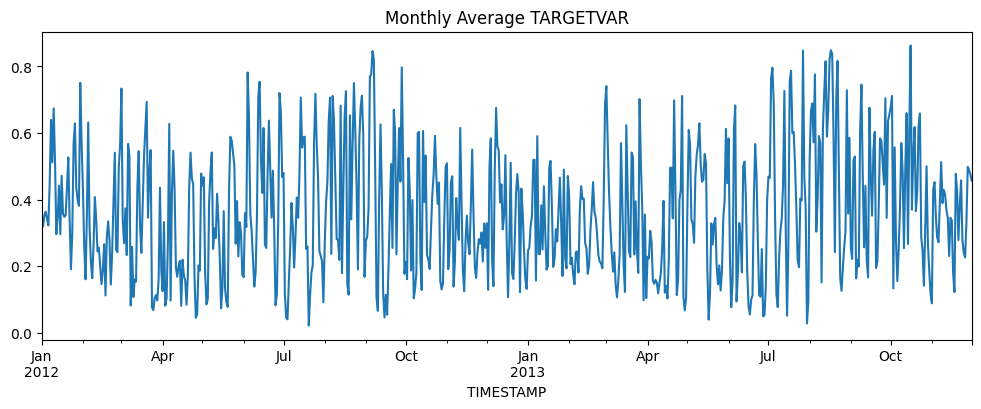

In [24]:
dataset.resample("D")["TARGETVAR"].mean().plot(figsize=(12,4), title="Monthly Average TARGETVAR")

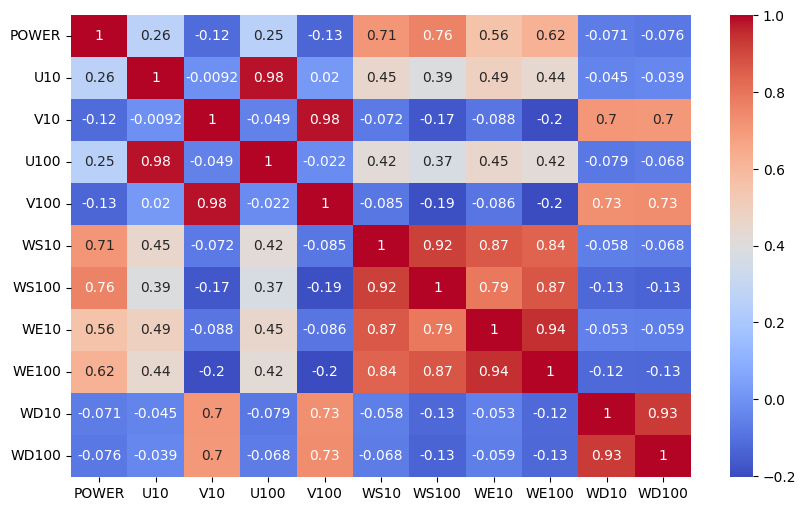

In [25]:
import seaborn as sns

correleations = dataset[['TARGETVAR', 'U10', 'V10', 'U100', 'V100', 'ws10', 'ws100', 'we10', 'we100', 'wd10', 'wd100']]
correleations.columns = ['POWER', 'U10', 'V10', 'U100', 'V100', 'WS10', 'WS100', 'WE10', 'WE100', 'WD10', 'WD100']
correleations = correleations.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correleations, annot=True, cmap="coolwarm")
plt.show()

<Axes: xlabel='TIMESTAMP'>

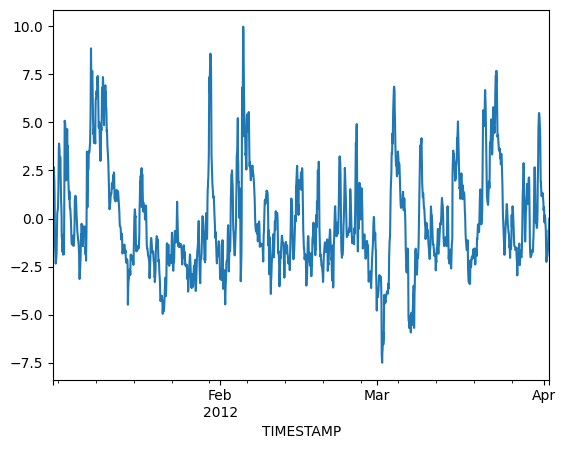

In [ ]:
dataset[dataset['ZONE_1'] == 1]['U10']['2012-01-01':'2012-04-01'].plot()

<Axes: xlabel='TIMESTAMP'>

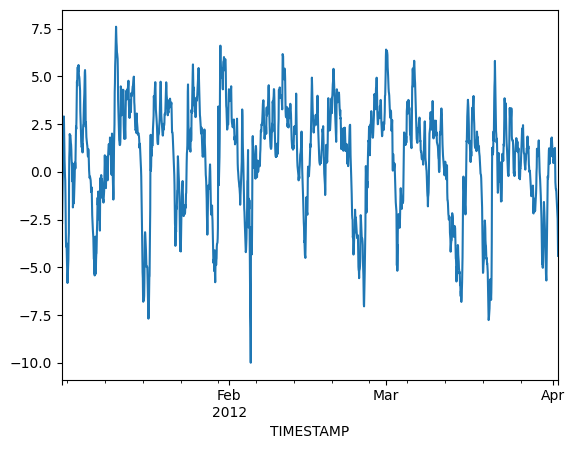

In [ ]:
dataset[dataset['ZONE_1'] == 1]['V10']['2012-01-01':'2012-04-01'].plot()


<Axes: xlabel='TIMESTAMP'>

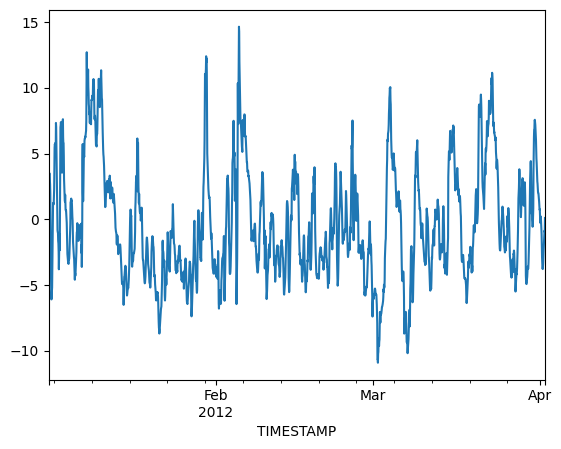

In [ ]:
dataset[dataset['ZONE_1'] == 1]['U100']['2012-01-01':'2012-04-01'].plot()


<Axes: xlabel='TIMESTAMP'>

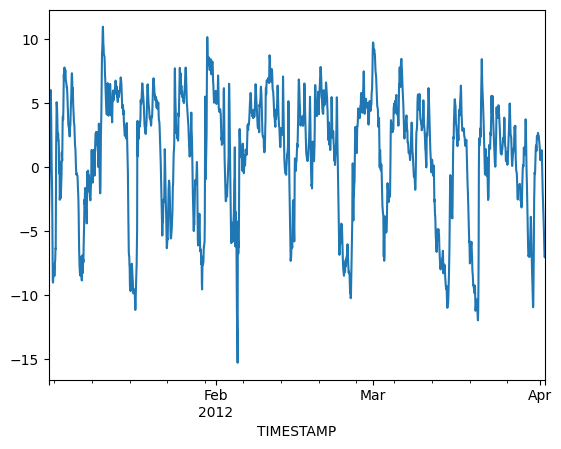

In [ ]:
dataset[dataset['ZONE_1'] == 1]['V100']['2012-01-01':'2012-04-01'].plot()


In [ ]:
dataset = create_wind_dataset()
prediction_dataset = dataset[dataset["TIMESTAMP"] >= "2013-11-02 01:00:00"].bfill()


In [ ]:
prediction_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6960 entries, 16104 to 16799
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   TIMESTAMP  6960 non-null   datetime64[ns]
 1   TARGETVAR  6960 non-null   float64       
 2   U10        6960 non-null   float64       
 3   V10        6960 non-null   float64       
 4   U100       6960 non-null   float64       
 5   V100       6960 non-null   float64       
 6   ZONE_1     6960 non-null   int64         
 7   ZONE_2     6960 non-null   int64         
 8   ZONE_3     6960 non-null   int64         
 9   ZONE_4     6960 non-null   int64         
 10  ZONE_5     6960 non-null   int64         
 11  ZONE_6     6960 non-null   int64         
 12  ZONE_7     6960 non-null   int64         
 13  ZONE_8     6960 non-null   int64         
 14  ZONE_9     6960 non-null   int64         
 15  ZONE_10    6960 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(10

In [ ]:
zones = ['ZONE_' + str(i) for i in range(1, 10 + 1)]

for zone in zones:
    zone_indices = prediction_dataset[zone] == 1
    prediction_dataset.loc[zone_indices, target_names] = prediction_dataset.loc[zone_indices, target_names].shift(-1)

prediction_dataset.dropna(inplace=True)

NameError: name 'target_names' is not defined

In [ ]:
prediction_dataset.head()

TIMESTAMP  TARGETVAR       U10       V10      U100      V100  \
16104 2013-11-02 01:00:00   0.085412  4.219113  0.481364  5.543366  0.481905   
16105 2013-11-02 02:00:00   0.083100  4.162588  0.864404  5.466836  0.991069   
16106 2013-11-02 03:00:00   0.064850  4.026100  1.086607  5.299389  1.294454   
16107 2013-11-02 04:00:00   0.041368  4.023802  1.196966  5.325283  1.432469   
16108 2013-11-02 05:00:00   0.046356  4.085842  1.230618  5.446696  1.530075   

       ZONE_1  ZONE_2  ZONE_3  ZONE_4  ZONE_5  ZONE_6  ZONE_7  ZONE_8  ZONE_9  \
16104       0       0       0       0       0       0       0       1       0   
16105       0       0       0       0       0       0       0       1       0   
16106       0       0       0       0       0       0       0       1       0   
16107       0       0       0       0       0       0       0       1       0   
16108       0       0       0       0       0       0       0       1       0   

       ZONE_10  
16104        0  
16105        0  
16106        0  
16107        0  
16108        0

In [ ]:
nf_wind = pd.read_csv('nf_wind.csv')

In [ ]:
nf = nf_wind.iloc[:500]

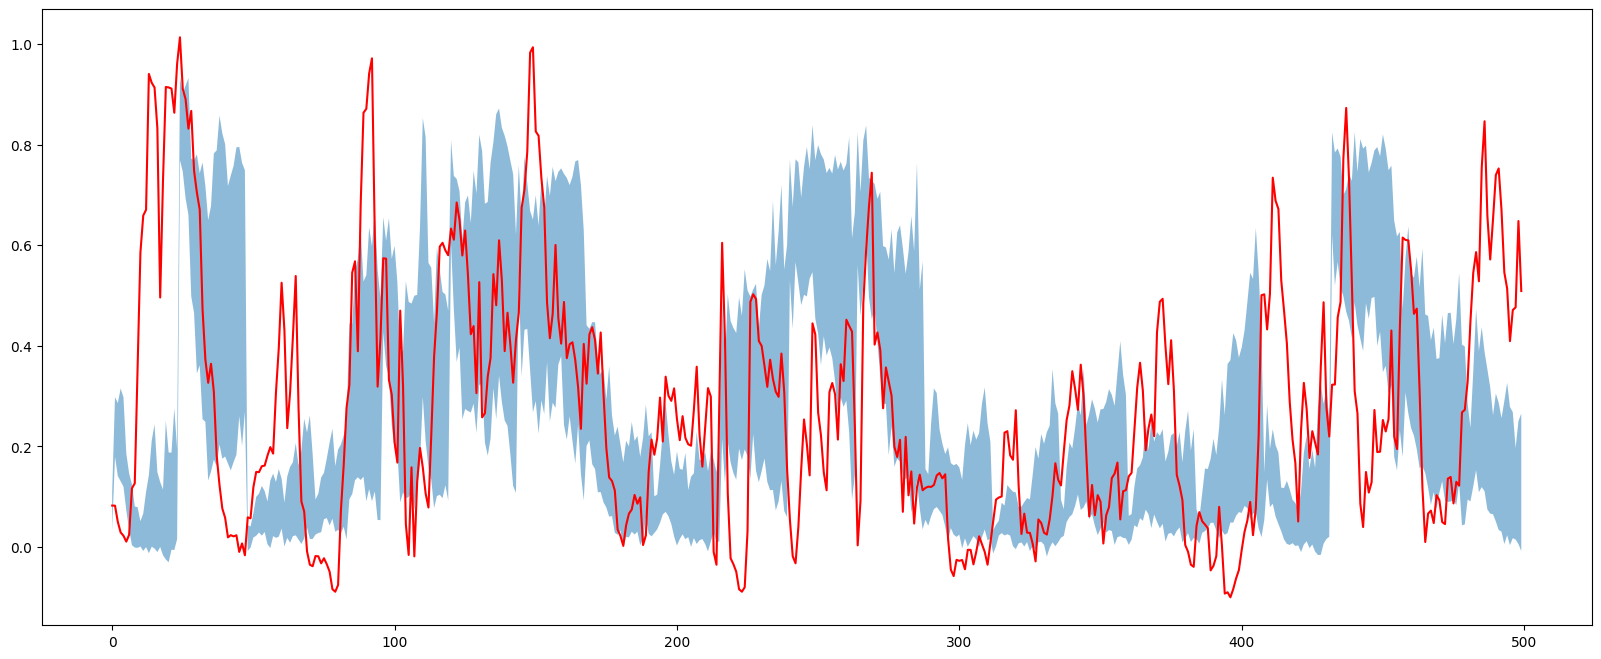

In [ ]:
plt.figure(figsize=(20, 8))
plt.fill_between(nf.index, nf['Q1'], nf['Q3'], alpha=0.5)
# nf['median'].plot()
nf['TARGETVAR'].plot(color='red', alpha=1)
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error

mean_squared_error(nf_wind['TARGETVAR'], nf_wind['median'])

0.09240907934569341